In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os import mkdir, path, getcwd
from osgeo import ogr

Indonesia
Malaysia
Chile
Bolivia
Peru
Argentina
Cyprus
India
People's Republic of China
Israel
Palestine
Lebanon
Ethiopia
South Sudan
Somalia
Kenya
Pakistan
Malawi
Tanzania
Syria
Suriname
Guyana
South Korea
North Korea
Morocco
Costa Rica
Nicaragua
Republic of the Congo
Democratic Republic of the Congo
Bhutan
Ukraine
Belarus
Namibia
South Africa
Saint Martin
Sint Maarten
Oman
Uzbekistan
Kazakhstan
Tajikistan
Lithuania
Brazil
Uruguay
Mongolia
Russia
Czech Republic
Germany
Estonia
Latvia
Sweden
Finland
Vietnam
Cambodia
Luxembourg
United Arab Emirates
Belgium
Georgia
Republic of Macedonia
Albania
Azerbaijan
Turkey
Spain
Laos
Kyrgyzstan
Armenia
Denmark
Libya
Tunisia
Romania
Hungary
Slovakia
Poland
Ireland
United Kingdom
Greece
Zambia
Sierra Leone
Guinea
Liberia
Central African Republic
Sudan
Djibouti
Eritrea
Austria
Iraq
Italy
Switzerland
Iran
Liechtenstein
Ivory Coast
Serbia
Mali
Senegal
Nigeria
Benin
Angola
Croatia
Slovenia
Qatar
Saudi Arabia


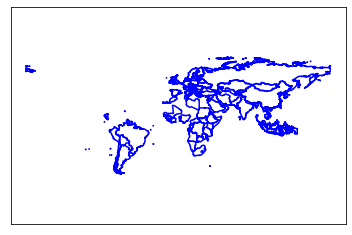

In [38]:
ds = ogr.Open(r'test2')



def create_temp_lyr(ds, percentage, period, symbol, **kwargs):
    sql_statment = '''SELECT * FROM 'final' order by {0} desc limit {1}'''.format(period, percentage)
    lyr = ds.ExecuteSQL(sql_statment, dialect='SQlite')
    for row in lyr:
        print(row.GetField('NAME_EN'))
        geom = row.geometry()
        geom_type = geom.GetGeometryType()
        if geom_type == ogr.wkbPolygon:
            plot_polygon(geom, symbol='b', **kwargs)
        elif geom_type == ogr.wkbMultiPolygon:
            for i in range(geom.GetGeometryCount()):
                subgeom = geom.GetGeometryRef(i)
                plot_polygon(subgeom, symbol='b', **kwargs)

def get_variation_values(ds, period):
    
    var_values = []
    
    for feature in ds.GetLayer(0):
        var_values.append(feature.GetField(period))
        
    var_array = np.array(var_values)
    
    return np.sort(var_array)[::-1]
    
def plot_polygon(poly, symbol = 'k-', **kwargs):
    for i in range(poly.GetGeometryCount()):
        subgeom = poly.GetGeometryRef(i)
        x, y = zip(*subgeom.GetPoints())
        plt.plot(x, y, symbol, **kwargs)
    
def get_geometries(ds, countries, **kwargs):
    for feature in ds.GetLayer(0):
        for i in countries[:20]:
            country = feature.GetField('NAME_EN')
            value = feature.GetField('2010-2011')
            geom = feature.geometry()
            geom_type = geom.GetGeometryType()
            if geom_type == ogr.wkbPolygon:
                plot_polygon(geom, symbol='b', **kwargs)
            elif geom_type == ogr.wkbMultiPolygon:
                for i in range(geom.GetGeometryCount()):
                    subgeom = geom.GetGeometryRef(i)
                    plot_polygon(subgeom, symbol='b', **kwargs)
                

create_temp_lyr(ds=ds, percentage=100, period="2010-2011", symbol='b' )
plt.axis('equal')
plt.gca().get_xaxis().set_ticks([])
plt.gca().get_yaxis().set_ticks([])
plt.show() 